# Section 1
#### Import necessary packages for feature engineering

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import MeanMedianImputer
from feature_engine.selection import DropConstantFeatures
from scipy.stats import zscore

#### Load cleaned dataset

In [14]:
clean_stock_df = pd.read_csv('/Users/jotech/Milestone Repo/milestone-project-market-prediction-model/data/^GSPC.csv')
clean_stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-22,4355.399902,4382.250000,4351.819824,4381.890137,4381.890137,3511000000
1,2023-06-21,4380.009766,4386.220215,4360.140137,4365.689941,4365.689941,3709330000
2,2023-06-20,4396.109863,4400.149902,4367.189941,4388.709961,4388.709961,4055790000
3,2023-06-16,4440.950195,4448.470215,4407.439941,4409.589844,4409.589844,6848600000
4,2023-06-15,4365.330078,4439.200195,4362.600098,4425.839844,4425.839844,4176690000


#### Extract Date and Time features

In [15]:
clean_stock_df['Date'] = pd.to_datetime(clean_stock_df['Date'])
clean_stock_df['DayOfWeek'] = clean_stock_df['Date'].dt.dayofweek
clean_stock_df['Month'] = clean_stock_df['Date'].dt.month
clean_stock_df['Year'] = clean_stock_df['Date'].dt.year

#### Extract lagging feature columns for additional pattern recognition

In [16]:
clean_stock_df['PreviousClose'] = clean_stock_df['Close'].shift(1)
clean_stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Year,PreviousClose
0,2023-06-22,4355.399902,4382.250000,4351.819824,4381.890137,4381.890137,3511000000,3,6,2023,NaN
1,2023-06-21,4380.009766,4386.220215,4360.140137,4365.689941,4365.689941,3709330000,2,6,2023,4381.890137
2,2023-06-20,4396.109863,4400.149902,4367.189941,4388.709961,4388.709961,4055790000,1,6,2023,4365.689941
3,2023-06-16,4440.950195,4448.470215,4407.439941,4409.589844,4409.589844,6848600000,4,6,2023,4388.709961
4,2023-06-15,4365.330078,4439.200195,4362.600098,4425.839844,4425.839844,4176690000,3,6,2023,4409.589844


#### Create rolling mean and standard deviation for additional pattern recognition

In [21]:
clean_stock_df['RollingMean_7'] = clean_stock_df['Close'].rolling(window=7).mean()
clean_stock_df['RollingStd_30'] = clean_stock_df['Close'].rolling(window=30).std()

# since we are using 30 and 7 day windows, we will have to look at the tail to see the values
clean_stock_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Year,PreviousClose,RollingMean_7,RollingStd_30
246,2022-06-29,3825.090088,3836.500000,3799.020020,3818.830078,3818.830078,4211240000,2,6,2022,3785.379883,3844.001430,136.149414
247,2022-06-28,3913.000000,3945.860107,3820.139893,3821.550049,3821.550049,4270120000,1,6,2022,3818.830078,3832.882882,130.460221
248,2022-06-27,3920.760010,3927.719971,3889.659912,3900.110107,3900.110107,4325310000,0,6,2022,3821.550049,3832.524309,126.754057
249,2022-06-24,3821.750000,3913.649902,3821.750000,3911.739990,3911.739990,8120260000,4,6,2022,3900.110107,3842.047154,121.406082
250,2022-06-23,3774.709961,3802.580078,3743.520020,3795.729980,3795.729980,5098640000,3,6,2022,3911.739990,3836.952881,117.525298


#### Analyze feature correlations

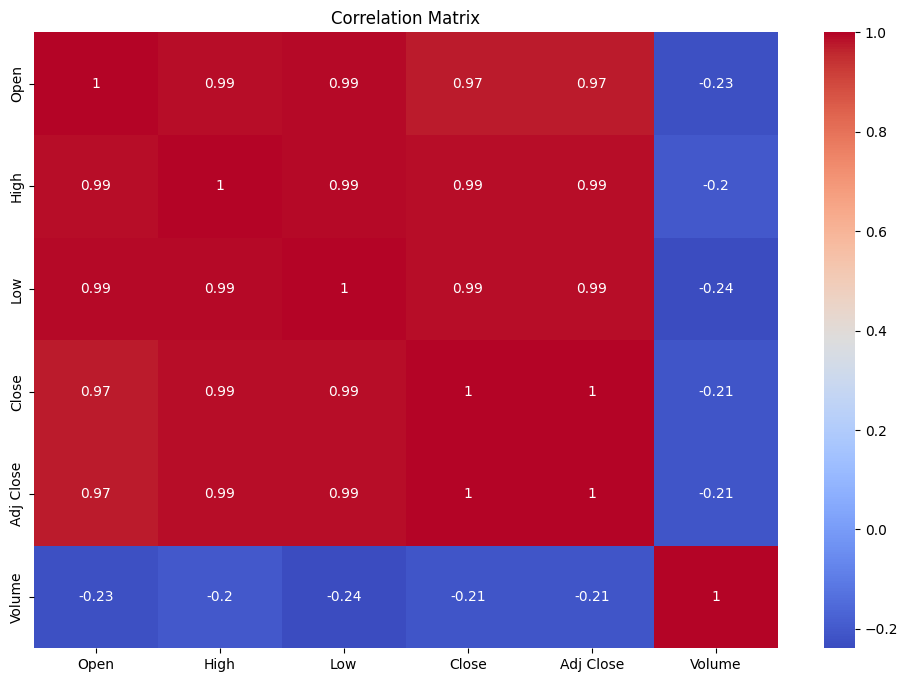

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()